In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
import string

## Read Data

In [3]:
data = pd.read_json("news-category-dataset/News_Category_Dataset_v2.json", lines=True)
data.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [107]:
# extract required data

input_data = data[['headline', 'short_description']]
output_data = data[['category']]
data['category'].value_counts()

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

## Data Preprocessing

Remove punctuations, digits and stopwords from concatenation of headline and short description

In [108]:
def preprocess_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.translate(str.maketrans('', '', string.digits))
    text_tokens = word_tokenize(text.lower())
    text_vec = [w for w in text_tokens if not w in stop_words]
    text_str = (" ").join(text_vec)
    return text_str

In [5]:
# combine heading and short_desc without stopwords
X = []
y = []
stop_words = set(stopwords.words('english'))
for i in range(len(data)):
    if i%10000==0:
        print("Iteration", i)
    str1 = input_data.iloc[i,0] + ' ' + input_data.iloc[i,1]
    str1 = preprocess_text(str1)
    X.append(str1)
    y.append(output_data.iloc[i,0])
    
X[0], y[0]

Iteration 0
Iteration 10000
Iteration 20000
Iteration 30000
Iteration 40000
Iteration 50000
Iteration 60000
Iteration 70000
Iteration 80000
Iteration 90000
Iteration 100000
Iteration 110000
Iteration 120000
Iteration 130000
Iteration 140000
Iteration 150000
Iteration 160000
Iteration 170000
Iteration 180000
Iteration 190000
Iteration 200000


('mass shootings texas last week tv left husband killed children another day america',
 'CRIME')

## Vectorization of text data

Vectorize the text data using TF-IDF 

In [12]:
# vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)
print(X_tfidf.shape)

(200853, 107760)


In [59]:
labels = list(data['category'].unique())
ids = [i for i in range(len(labels))]
labels_dict = dict(zip(labels, ids))
y_nums = [labels_dict[y[i]] for i in range(len(y))]
len(y_nums), len(labels_dict)

(200853, 41)

In [8]:
X_tfidf[0].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [14]:
X_tfidf[0]

<1x107760 sparse matrix of type '<class 'numpy.float64'>'
	with 13 stored elements in Compressed Sparse Row format>

## Building the ANN

This is a 3-layer ANN model. The model gave about 99.9% accuracy

In [15]:
from keras.models import Sequential
from keras.layers import Dense

In [36]:
model = Sequential()

model.add(Dense(units=64, activation='relu', input_dim=X_tfidf.shape[1]))

model.add(Dense(units=64, activation='relu'))

model.add(Dense(units=41, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 64)                6896704   
_________________________________________________________________
dense_17 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_18 (Dense)             (None, 41)                2665      
Total params: 6,903,529
Trainable params: 6,903,529
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [38]:
history = model.fit(X_tfidf, y_nums, batch_size=64, epochs=50)

Epoch 1/50
200853/200853 [==============================] - 498s 2ms/step - loss: 1.8426 - acc: 0.5102
Epoch 2/50
200853/200853 [==============================] - 498s 2ms/step - loss: 1.0042 - acc: 0.7082
Epoch 3/50
200853/200853 [==============================] - 498s 2ms/step - loss: 0.6462 - acc: 0.8078
Epoch 4/50
200853/200853 [==============================] - 502s 3ms/step - loss: 0.4146 - acc: 0.8740
Epoch 5/50
200853/200853 [==============================] - 499s 2ms/step - loss: 0.2662 - acc: 0.9182
Epoch 6/50
200853/200853 [==============================] - 504s 3ms/step - loss: 0.1703 - acc: 0.9472
Epoch 7/50
200853/200853 [==============================] - 501s 2ms/step - loss: 0.1084 - acc: 0.9662
Epoch 8/50
200853/200853 [==============================] - 502s 2ms/step - loss: 0.0684 - acc: 0.9782
Epoch 9/50
200853/200853 [==============================] - 511s 3ms/step - loss: 0.0451 - acc: 0.9850
Epoch 10/50
200853/200853 [==============================] - 506s 3ms/ste

In [39]:
model.save('model.h5')

In [40]:
history.history.keys()

dict_keys(['loss', 'acc'])

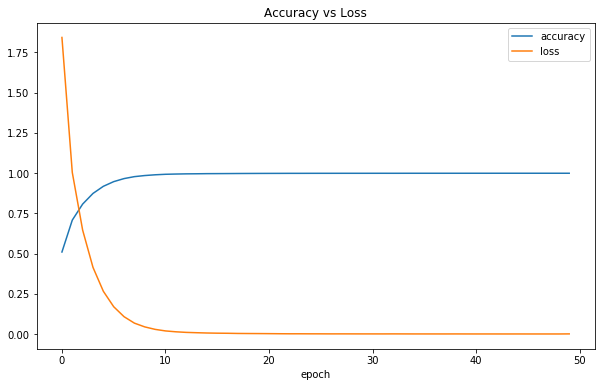

In [109]:
plt.figure(figsize=(10,6))
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('Accuracy vs Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'])
plt.show()

## Testing on random news articles

In [110]:
# Testing
headline = "One-and-a-half-month-old Baby Dies of Coronavirus in Delhi Hospital; 16,000 Active Cases in India"
short_desc = "A one-and-a-half-month-old baby boy in Delhi has died of coronavirus becoming the country’s youngest victim of the infection which also affected a 12-day-old infant girl in Bhopal, as COVID-19 cases jumped by over one thousand for the sixth straight day on Sunday prompting authorities to scale up rapid antibody based blood tests."

test = headline + ' ' + short_desc
test = preprocess_text(test)
X_test = []
X_test.append(test)

X_test_tfidf = tfidf.transform(X_test)
X_test_tfidf.shape, test

((1, 107760),
 'oneandahalfmonthold baby dies coronavirus delhi hospital active cases india oneandahalfmonthold baby boy delhi died coronavirus becoming country ’ youngest victim infection also affected dayold infant girl bhopal covid cases jumped one thousand sixth straight day sunday prompting authorities scale rapid antibody based blood tests')

In [111]:
pred = model.predict(X_test_tfidf)[0]
pred_index = np.argmax(pred)
conf = pred[pred_index]
result = labels[pred_index]

print("Text belongs to {} category with a confidence of {:.2f}%".format(result, conf*100))

Text belongs to WELLNESS category with a confidence of 94.52%


In [116]:
headline = "CBSE to rationalise syllabus for classes 9-12 to make up for lost time due to Covid-19 lockdown"
short_desc = "The Central Board of Secondary Education (CBSE) is considering rationalising the syllabus for classes 9 to 12 for the next academic year to make up for lost time due to the Covid-19 pandemic. The board is presently in the process of assessing the situation as well as the loss and a call in this regard will be taken accordingly."

test = headline + ' ' + short_desc
test = preprocess_text(test)
X_test = []
X_test.append(test)

X_test_tfidf = tfidf.transform(X_test)
X_test_tfidf.shape, test

((1, 107760),
 'cbse rationalise syllabus classes make lost time due covid lockdown central board secondary education cbse considering rationalising syllabus classes next academic year make lost time due covid pandemic board presently process assessing situation well loss call regard taken accordingly')

In [117]:
pred = model.predict(X_test_tfidf)[0]
pred_index = np.argmax(pred)
conf = pred[pred_index]
result = labels[pred_index]

print("Text belongs to {} category with a confidence of {:.2f}%".format(result, conf*100))

Text belongs to EDUCATION category with a confidence of 87.20%
